In [1]:
# How many tasks require multiple shops?
# What types of tasks are these?
# What shops are most responsible
# How long do these tasks take?
# What Buildings are these associated with?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
df9 = pd.read_csv("/Users/danielsoriano/Downloads/ds/Deep_Dive_Last_12_Months.csv", sep = ",")
df9[['cstEstimatedHoursNU', 'Actual Labor Hours', 'Hours']]
df9['Created Date/Time'] = pd.to_datetime(df9['Created Date/Time'])
df9['Actual Start'] = pd.to_datetime(df9['Actual Start'])
df9['Actual End'] = pd.to_datetime(df9['Actual End'])

In [4]:
df = df9.drop(['Accounting Code', 'Sub Accounting Code',
               'Project Code', 'Object Code', 'Unnamed: 17', 'Unnamed: 19',
               'Unnamed: 32', 'Time Category', 'Fiscal Year', 'Primary Organization'], axis=1)

In [7]:
# Data Cleaning
df2 = df[df['Task Type'] != 'Preventive']
df2.to_csv('new_data.csv', index=False)
df2 = df2.reindex(columns=['Unnamed: 0', 'Zone', 'Project ID', 'Project Name','Task Name', 'Service Assignment Class', 
                           'Work Group Class', 'Funding Type','cstEstimatedHoursNU', 'Actual Labor Hours', 'Created Date/Time', 
                           'Actual Start' , 'Actual End', 'Completed Date' , 'Planned Start','Task Priority', 'Task Status',
                           'Organization Name','Primary Organization', 'Labor Class', 'Hours', 'Labor Date','modified task type',
                           'Responsible Person', 'Person', 'Building', 'Task ID','Task Type','Responsible Organization',
                           'majority workgroup', 'year_month'])
df2

,Unnamed: 0,Zone,Project ID,Project Name,Task Name,Service Assignment Class,Work Group Class,Funding Type,cstEstimatedHoursNU,Actual Labor Hours,...,Labor Date,modified task type,Responsible Person,Person,Building,Task ID,Task Type,Responsible Organization,majority workgroup,year_month
4,4,D036,NaN,NaN,"LAB RM 136 BOX 8 PROGRAM NIGHT CYCLE, 38C DAY ...",Environmental Conservation Office,ECO,General Funded,0.0,8.25,...,2022-07-01,Routine,Eric Davis,Eric Davis,Mann Laboratory,2323168,Corrective,ENG HVAC Controls Shop,ENG HVAC Controls Shop,2022-07
5,5,C129,1003479.0,"Gallery 1, 2 & 5 turnover",Paint Shrem Gallery 2,Structural,BMS,Departmental,32.0,33.00,...,2022-07-01,Routine,Jeffery Airehart,Gustavo Solorzano,Shrem Museum of Art,2249392,New Work,BMS Paint Shop,BMS Paint Shop,2022-07
6,6,O007,NaN,NaN,PROVIDE ESTIMATE TO REMOVE/INSTALL CARPET TAHO...,Structural,BMS,Departmental,0.0,118.25,...,2022-07-01,Routine,Gary Reust,Gary Reust,Tahoe Hall,2212980,Service,BMS Flooring Shop,BMS Flooring Shop,2022-07
7,7,F244,NaN,NaN,EAST DOOR OF MAIN DOUBLE DOORS 1001 NOT CLOSIN...,Structural,BMS,Departmental,0.0,1.50,...,2022-07-01,Routine,Rodger Young,Rodger Young,Student Health & Wellness Center,2323042,Corrective,BMS Lock Shop,BMS Lock Shop,2022-07
8,8,E164,NaN,NaN,MRR 156 TOILETS CLOGGED,Plumbing,BMS,General Funded,0.0,0.00,...,2022-07-01,Routine,Francis Drumm,Francis Drumm,Silo South,2322705,Corrective,BMS Plumbing Shop,BMS Plumbing Shop,2022-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94171,152569,A016,NaN,NaN,ESTIMATE REQUEST: PAINT INTERIOR OF BUILDING,Structural,BMS,Departmental,0.0,44.25,...,2023-06-30,Routine,Christopher Martinez,Marine Erby,Temporary Building 119,2557842,Service,BMS Paint Shop,BMS Paint Shop,2023-06
94172,152570,C071,NaN,NaN,INTERIOR HALLWAY PAINT AT VARIOUS LOCATIONS,Structural,BMS,General Funded,0.0,16.50,...,2023-06-30,Routine,Gabriel Waterman,Gabriel Waterman,King Hall,2501968,Corrective,BMS Paint Shop,BMS Paint Shop,2023-06
94180,152578,D038,NaN,NaN,EL1 IS STUCK WITH DOORS OPEN ON THE 1ST,Electrical,BMS,General Funded,0.0,0.50,...,2023-06-30,Routine,Jason Sisneroz,Jason Sisneroz,Storer Hall,2572419,Corrective,BMS Elevator Shop,BMS Elevator Shop,2023-06
94183,152581,E067,NaN,NaN,CHCP OPERATIONS,Utilities,UTIL,General Funded,0.0,59986.00,...,2023-06-30,Routine,Robert Denison,Randy Bergstrom,Mechanical 2,CHCPOPS,Operations,UTIL Central Heating and Cooling Plants,UTIL Central Heating and Cooling Plants,2023-06


In [8]:
array = []
for i in range(len(df2)):
    if (df2['Responsible Organization'].iloc[i] == 'SH Maintenance - Cuarto' 
        or df2['Responsible Organization'].iloc[i] == 'SH Housing Service Desk'
        or df2['Responsible Organization'].iloc[i] == 'FM Custodial - Core 01 - Day Shift' 
        or df2['Responsible Organization'].iloc[i] == 'SH Maintenance - South' 
        or df2['Responsible Organization'].iloc[i] == 'UCD Grounds'):
        array.append(i)
print(array)

[26898, 30035, 30036, 40407, 42002, 44681, 44905, 45984, 50461, 51605, 58275]


In [9]:
df2.iloc[[26898, 30035, 30036, 40407, 42002, 44681, 44905, 45984, 50461, 51605, 58275]]

,Unnamed: 0,Zone,Project ID,Project Name,Task Name,Service Assignment Class,Work Group Class,Funding Type,cstEstimatedHoursNU,Actual Labor Hours,...,Labor Date,modified task type,Responsible Person,Person,Building,Task ID,Task Type,Responsible Organization,majority workgroup,year_month
41412,69137,C014,NaN,NaN,CLEAN WALKOFF MATS - SEE SCOPE,Custodial,CUST,General Funded,0.0,0.00,...,2022-12-15,Routine,NaN,Francis Drumm,Walker Hall,2444059,Service,FM Custodial - Core 01 - Day Shift,BMS Plumbing Shop,2022-12
45988,76561,O011,NaN,NaN,SINKS BACKING UP SHASTA 227/224,NaN,Housing,Departmental,0.0,4.00,...,2023-01-10,Routine,Jay Klinger,Jim Miller,Shasta Hall,2460283,Corrective,SH Maintenance - Cuarto,BMS Plumbing Shop,2023-01
45989,76562,O011,NaN,NaN,SINKS BACKING UP SHASTA 227/224,NaN,Housing,Departmental,0.0,4.00,...,2023-01-10,Routine,Jay Klinger,Donald Tadlock,Shasta Hall,2460283,Corrective,SH Maintenance - Cuarto,BMS Plumbing Shop,2023-01
61757,101258,E188,NaN,NaN,REPAIR LEAKING PIPES CURRANT 481,NaN,Housing,NaN,0.0,2.00,...,2023-03-06,Routine,NaN,Jonathan Baierski-Figor,Currant Hall,2478863,Corrective,SH Maintenance - South,BMS Plumbing Construction and Fire Protection,2023-03
64507,105411,O007,NaN,NaN,TOO COLD TAHOE 307D,NaN,Housing,Departmental,0.0,4.75,...,2023-03-14,Routine,Jay Klinger,Charles Simpson-kessler,Tahoe Hall,2488270,Corrective,SH Maintenance - Cuarto,BMS Refrigeration Shop,2023-03
68996,112515,E015,NaN,NaN,"SYSTEM ""A"" RUNNING WARM TDC",NaN,Housing,Departmental,0.0,14.50,...,2023-03-29,Routine,Steven Spears,Steven Spears,Tercero Services Center,2492008,Corrective,SH Housing Service Desk,BMS Refrigeration Shop,2023-03
69366,113144,E015,NaN,NaN,"SYSTEM ""A"" RUNNING WARM TDC",NaN,Housing,Departmental,0.0,14.50,...,2023-03-30,Routine,Steven Spears,Steven Spears,Tercero Services Center,2492008,Corrective,SH Housing Service Desk,BMS Refrigeration Shop,2023-03
71168,115922,O010,NaN,NaN,ELEVATOR DOWN YOSEMITE HALL,NaN,Housing,Departmental,0.0,3.00,...,2023-04-06,Routine,Jay Klinger,Jason Sisneroz,Yosemite Hall,2498543,Corrective,SH Maintenance - Cuarto,BMS Elevator Shop,2023-04
78400,127561,E015,NaN,NaN,EMERGENCY BUG EYE LIGHT IS BEEPING; REPLACE BA...,NaN,Housing,Departmental,0.0,1.00,...,2023-05-03,Routine,NaN,Jason Sisneroz,Tercero Services Center,2538309,Corrective,SH Housing Service Desk,BMS Elevator Shop,2023-05
80417,130540,O011,NaN,NaN,ELEVATOR NOT RESPONDING SHASTA BLD 3,NaN,Housing,Departmental,0.0,2.50,...,2023-05-09,Routine,Jay Klinger,Jason Sisneroz,Shasta Hall,2539036,Corrective,SH Maintenance - Cuarto,BMS Elevator Shop,2023-05


In [10]:
df2 = df2.drop(labels=[41412,45988,45989,61757,64507,68996,69366,71168,78400,80417,91870], axis=0)

In [11]:
# Replace Unwawnted workgroups and organizations
df2 = df2.sort_values('Task ID')
for i in range(len(df2)):
    if df2['majority workgroup'].iloc[i] == 'BMS Lighting Crew':
        df2['majority workgroup'].iloc[i] = 'BMS Electrical Maintenance'
    if df2['Responsible Organization'].iloc[i] == 'BMS Lighting Crew':
        df2['Responsible Organization'].iloc[i] = 'BMS Electrical Maintenance'
    if df2['majority workgroup'].iloc[i] == 'Plumbing':
        df2['majority workgroup'].iloc[i] = 'BMS Plumbing Shop'
    if df2['Responsible Organization'].iloc[i] == 'Plumbing':
        df2['Responsible Organization'].iloc[i] = 'BMS Plumbing Shop'
        
    if df2['Person'].iloc[i] == 'Debra White':
        df2['majority workgroup'].iloc[i] = 'BMS Plumbing Shop'
    if df2['Person'].iloc[i] == 'Christopher Deutsch':
        df2['majority workgroup'].iloc[i] = 'BMS Plumbing/Steam IPE'
    if df2['Person'].iloc[i] == 'Joseph Burns':
        df2['majority workgroup'].iloc[i] = 'BMS Electrical Construction'
    if df2['Person'].iloc[i] == 'Joel Del Rio':
        df2['majority workgroup'].iloc[i] = 'UTIL Instrumentation and Controls'
    if df2['Person'].iloc[i] == 'Stuart Zane':
        df2['majority workgroup'].iloc[i] = 'BMS Security Alarms'
    if df2['Person'].iloc[i] == 'Zachary Dodson':
        df2['majority workgroup'].iloc[i] = 'UTIL High Voltage'
    if df2['Person'].iloc[i] == 'Gustavo Sanchez Rodriguez':
        df2['majority workgroup'].iloc[i] = 'BMS Roofing Shop'
    if df2['Person'].iloc[i] == 'Anthony Beaman':
        df2['majority workgroup'].iloc[i] = 'BMS Roofing Shop'
    if df2['Person'].iloc[i] == 'James Hull':
        df2['majority workgroup'].iloc[i] = 'UTIL Waste Water Treatment Plant and Drainage'
    if df2['Person'].iloc[i] == 'Nathan Wilkinson':
        df2['majority workgroup'].iloc[i] = 'BMS Sheetmetal Shop'
# Debra White = BMS Plumbing Shop
# Christopher Deutsch = BMS Plumbing/Steam IPE
# Joseph Burns = BMS Electrical Construction
# Stuart Zane -> BMS Security Alarms
# Zachary Dodson -> UTIL High Voltage
# Gustavo Sanchez Rodriguez -> BMS Roofing Shop
# Anthony Beaman -> BMS Roofing Shop
# James Hull -> UTIL Waste Water Treatment Plant and Drainage
# Nathan Wilkinson -> BMS Sheetmetal Shop

/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_94519/2741214110.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['majority workgroup'].iloc[i] = 'UTIL Instrumentation and Controls'
/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_94519/2741214110.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['majority workgroup'].iloc[i] = 'BMS Plumbing Shop'
/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_94519/2741214110.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [12]:
TotalDays = []
for i in range(len(df2)):
    start = df2['Actual Start'].iloc[i]
    end = df2['Actual End'].iloc[i]
    TotalDays.append(end - start)
TotalDays
df2['Total Days'] = TotalDays
df2

,Unnamed: 0,Zone,Project ID,Project Name,Task Name,Service Assignment Class,Work Group Class,Funding Type,cstEstimatedHoursNU,Actual Labor Hours,...,modified task type,Responsible Person,Person,Building,Task ID,Task Type,Responsible Organization,majority workgroup,year_month,Total Days
29544,49822,E067,NaN,NaN,CEMS MAINTENANCE,Utilities,UTIL,General Funded,0.0,312.0,...,Routine,James Thrash,Oscar Gonzalez,Mechanical 2,1067248,Corrective,UTIL Central Heating and Cooling Plants,UTIL Central Heating and Cooling Plants,2022-10,196 days
75523,123087,E067,NaN,NaN,CEMS MAINTENANCE,Utilities,UTIL,General Funded,0.0,312.0,...,Routine,James Thrash,Oscar Gonzalez,Mechanical 2,1067248,Corrective,UTIL Central Heating and Cooling Plants,UTIL Central Heating and Cooling Plants,2023-04,196 days
43255,72193,E067,NaN,NaN,CEMS MAINTENANCE,Utilities,UTIL,General Funded,0.0,312.0,...,Routine,James Thrash,Oscar Gonzalez,Mechanical 2,1067248,Corrective,UTIL Central Heating and Cooling Plants,UTIL Central Heating and Cooling Plants,2022-12,196 days
32353,54543,E067,NaN,NaN,CEMS MAINTENANCE,Utilities,UTIL,General Funded,0.0,312.0,...,Routine,James Thrash,Oscar Gonzalez,Mechanical 2,1067248,Corrective,UTIL Central Heating and Cooling Plants,UTIL Central Heating and Cooling Plants,2022-11,196 days
68076,111139,E067,NaN,NaN,CEMS MAINTENANCE,Utilities,UTIL,General Funded,0.0,312.0,...,Routine,James Thrash,Oscar Gonzalez,Mechanical 2,1067248,Corrective,UTIL Central Heating and Cooling Plants,UTIL Central Heating and Cooling Plants,2023-03,196 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60201,98695,NaN,NaN,NaN,STORM DRAIN I&C SUPPORT MASTER WORK ORDER1 FY ...,Utilities,UTIL,General Funded,0.0,47.0,...,Routine,Nicholas Harden,Emilio Solorzano,Storm Drainage Collection Drain/Drop Inlets,STRMIC22,Corrective,UTIL Instrumentation and Controls,UTIL Instrumentation and Controls,2023-02,NaT
60200,98694,NaN,NaN,NaN,STORM DRAIN I&C SUPPORT MASTER WORK ORDER1 FY ...,Utilities,UTIL,General Funded,0.0,47.0,...,Routine,Nicholas Harden,Damodar Homagain,Storm Drainage Collection Drain/Drop Inlets,STRMIC22,Corrective,UTIL Instrumentation and Controls,UTIL Instrumentation and Controls,2023-02,NaT
46342,76967,NaN,NaN,NaN,STORM DRAIN I&C SUPPORT MASTER WORK ORDER1 FY ...,Utilities,UTIL,General Funded,0.0,47.0,...,Routine,Nicholas Harden,Damodar Homagain,Storm Drainage Collection Drain/Drop Inlets,STRMIC22,Corrective,UTIL Instrumentation and Controls,UTIL Instrumentation and Controls,2023-01,NaT
37162,62170,NaN,NaN,NaN,STORM DRAIN I&C SUPPORT MASTER WORK ORDER1 FY ...,Utilities,UTIL,General Funded,0.0,47.0,...,Routine,Nicholas Harden,Damodar Homagain,Storm Drainage Collection Drain/Drop Inlets,STRMIC22,Corrective,UTIL Instrumentation and Controls,UTIL Instrumentation and Controls,2022-11,NaT


In [17]:
def Num_of_Unique_TaskIDs(df):
    newdf = pd.DataFrame({'Task ID': [], 'Number of entries': [], 'Responsible Organization': [], '# of MWg': [], 
                          'majority workgroup': [], 'Task Type': [], 'Building': [], 'Actual Labor Hours':[],
                         'Total Days': []})
    count = 1
    k = 0
    p = 0
    ar = []
    for i in range(df.shape[0]-1):
        td = df['Actual End'].iloc[i] - df['Actual Start'].iloc[i]
        if df['Task ID'].iloc[i] == df['Task ID'].iloc[i+1]:
            count += 1
            ar.append(df['majority workgroup'].iloc[i])
        else:
            if count == 1:
                new_row = {'Task ID':df['Task ID'].iloc[i], 'Number of entries':count, 
                           'Responsible Organization':df['Responsible Organization'].iloc[i], '# of MWg': 1,
                           'majority workgroup': df['majority workgroup'].iloc[i],'Task Type':df['Task Type'].iloc[i], 
                           'Building':df['Building'].iloc[i], 'Actual Labor Hours':df['Actual Labor Hours'].iloc[i],
                          'Total Days': td}
                newdf.loc[k] = new_row
                count = 1
                k += 1
                p += 1
            else:
                new_row = {'Task ID':df['Task ID'].iloc[i], 'Number of entries':count, 
                           'Responsible Organization':df['Responsible Organization'].iloc[i], '# of MWg': len(list(set(ar))),
                           'majority workgroup': list(set(ar)),'Task Type':df['Task Type'].iloc[i], 
                           'Building':df['Building'].iloc[i], 'Actual Labor Hours':df['Actual Labor Hours'].iloc[i],
                          'Total Days': td}
                newdf.loc[k] = new_row
                count = 1
                k += 1
            ar = []
    #print(p, 'Task ID\'s only have 1 entry') -> 11805 tasks ID's only have 1 entry
    return newdf

In [18]:
Unique_TaskIDs = Num_of_Unique_TaskIDs(df2)
Unique_TaskIDs

/Users/danielsoriano/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


,Task ID,Number of entries,Responsible Organization,# of MWg,majority workgroup,Task Type,Building,Actual Labor Hours,Total Days
0,1067248,11,UTIL Central Heating and Cooling Plants,1,[UTIL Central Heating and Cooling Plants],Corrective,Mechanical 2,312.00,196 days 00:00:00
1,1075595,145,UTIL Instrumentation and Controls,1,[UTIL Instrumentation and Controls],New Work,NaN,4996.50,NaT
2,1269511,1,BMS Plumbing Shop,1,BMS Plumbing Shop,Corrective,South Hall,0.00,NaN
3,1465354,4,BMS Plumbing Shop,1,[BMS Plumbing Shop],Corrective,Tupper Hall,24.75,1353 days 00:00:00
4,1498213,2,BMS Refrigeration Shop,1,[BMS Refrigeration Shop],Corrective,Facilities Shops,54.75,NaN
...,...,...,...,...,...,...,...,...,...
22110,OPWATER,825,"UTIL Water, Gas and Pools",1,"[UTIL Water, Gas and Pools]",Operations,Domestic Water Distribution,10038.85,NaN
22111,PRIMOPS,234,UTIL Central Heating and Cooling Plants,1,[UTIL Central Heating and Cooling Plants],Operations,Primate Laboratory (CHECK-IN/PPE REQ’D),48307.00,NaN
22112,RDIC21,16,UTIL Instrumentation and Controls,1,[UTIL Instrumentation and Controls],Corrective,Renewable Energy Anaerobic Digestor (READ),204.00,NaN
22113,RRIRRI20,1,UTIL Instrumentation and Controls,1,UTIL Instrumentation and Controls,Operations,UCD Buildings,18.50,NaN


In [19]:
# df2 is the cleaned/full data set

# df4 contains all the tasks id's with different majority workgroups

df4 = pd.DataFrame(data=None, columns=df2.columns, index=None)
for i in range(Num_of_Unique_TaskIDs(df2).shape[0]):
    if Unique_TaskIDs['# of MWg'].iloc[i] != 1:
        entry = df2.loc[df2['Task ID'] == Unique_TaskIDs['Task ID'].iloc[i]]
        df4 = pd.concat([df4,entry])    
df4

/Users/danielsoriano/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


,Unnamed: 0,Zone,Project ID,Project Name,Task Name,Service Assignment Class,Work Group Class,Funding Type,cstEstimatedHoursNU,Actual Labor Hours,...,modified task type,Responsible Person,Person,Building,Task ID,Task Type,Responsible Organization,majority workgroup,year_month,Total Days
18649,31921,D061,NaN,NaN,DCM REQUEST: ATTN DEBRA WHITE & JIMMY MILLER -...,Plumbing,BMS,Departmental,0.0,60.25,...,Routine,John Dawson,James Medeiros,Briggs Hall,1752613,Service,BMS Plumbing Construction and Fire Protection,BMS Plumbing Construction and Fire Protection,2022-09,1034 days
2918,4887,D061,NaN,NaN,DCM REQUEST: ATTN DEBRA WHITE & JIMMY MILLER -...,Plumbing,BMS,Departmental,0.0,60.25,...,Routine,John Dawson,Colby Naake,Briggs Hall,1752613,Service,BMS Plumbing Construction and Fire Protection,BMS Fire Alarm Shop,2022-07,1034 days
6377,10829,D061,NaN,NaN,DCM REQUEST: ATTN DEBRA WHITE & JIMMY MILLER -...,Plumbing,BMS,Departmental,0.0,60.25,...,Routine,John Dawson,John Harris,Briggs Hall,1752613,Service,BMS Plumbing Construction and Fire Protection,BMS Plumbing Shop,2022-07,1034 days
55546,91341,C112,NaN,NaN,INSTALL AUTO CLOSER ON TWO EXTERIOR GATES BETW...,Structural,BMS,Departmental,0.0,22.25,...,Routine,Richard Knee,Jacob Mcintire,CFA Mondavi,1773083,New Work,BMS Lock Shop,BMS Lock Shop,2023-02,1010 days
36249,60817,C112,NaN,NaN,INSTALL AUTO CLOSER ON TWO EXTERIOR GATES BETW...,Structural,BMS,Departmental,0.0,22.25,...,Routine,Richard Knee,Andrew Peart,CFA Mondavi,1773083,New Work,BMS Lock Shop,BMS Welding Shop,2022-11,1010 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,10283,F242,NaN,NaN,Recreation Pool Operations,Utilities,UTIL,General Funded,0.0,2880.50,...,Routine,Nicholas Carpenter,Chad Reis,Recreation Pool Chemical Storage,OPRPL20,Operations,"UTIL Water, Gas and Pools","UTIL Water, Gas and Pools",2022-07,NaT
50603,83522,F242,NaN,NaN,Recreation Pool Operations,Utilities,UTIL,General Funded,0.0,2880.50,...,Routine,Nicholas Carpenter,Kirk Schaake,Recreation Pool Chemical Storage,OPRPL20,Operations,"UTIL Water, Gas and Pools","UTIL Water, Gas and Pools",2023-01,NaT
18737,32027,F242,NaN,NaN,Recreation Pool Operations,Utilities,UTIL,General Funded,0.0,2880.50,...,Routine,Nicholas Carpenter,Gregory Folena,Recreation Pool Chemical Storage,OPRPL20,Operations,"UTIL Water, Gas and Pools","UTIL Water, Gas and Pools",2022-09,NaT
36348,60929,F242,NaN,NaN,Recreation Pool Operations,Utilities,UTIL,General Funded,0.0,2880.50,...,Routine,Nicholas Carpenter,William Self,Recreation Pool Chemical Storage,OPRPL20,Operations,"UTIL Water, Gas and Pools","UTIL Water, Gas and Pools",2022-11,NaT


In [20]:
multWg_df = Num_of_Unique_TaskIDs(df4)

/Users/danielsoriano/anaconda3/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


In [22]:
newdf = pd.DataFrame(data=None, columns=df2.columns, index=None)
for i in range(len(df4)-1):
    if (df4['Task ID'].iloc[i] != df4['Task ID'].iloc[i+1] or
       df4['majority workgroup'].iloc[i] != df4['majority workgroup'].iloc[i+1]):
        entry = df4.loc[df4['Task ID'] == Unique_TaskIDs['Task ID'].iloc[i]]
        newdf = pd.concat([newdf,entry])
newdf

,Unnamed: 0,Zone,Project ID,Project Name,Task Name,Service Assignment Class,Work Group Class,Funding Type,cstEstimatedHoursNU,Actual Labor Hours,...,modified task type,Responsible Person,Person,Building,Task ID,Task Type,Responsible Organization,majority workgroup,year_month,Total Days
18649,31921,D061,NaN,NaN,DCM REQUEST: ATTN DEBRA WHITE & JIMMY MILLER -...,Plumbing,BMS,Departmental,0.0,60.25,...,Routine,John Dawson,James Medeiros,Briggs Hall,1752613,Service,BMS Plumbing Construction and Fire Protection,BMS Plumbing Construction and Fire Protection,2022-09,1034 days
2918,4887,D061,NaN,NaN,DCM REQUEST: ATTN DEBRA WHITE & JIMMY MILLER -...,Plumbing,BMS,Departmental,0.0,60.25,...,Routine,John Dawson,Colby Naake,Briggs Hall,1752613,Service,BMS Plumbing Construction and Fire Protection,BMS Fire Alarm Shop,2022-07,1034 days
6377,10829,D061,NaN,NaN,DCM REQUEST: ATTN DEBRA WHITE & JIMMY MILLER -...,Plumbing,BMS,Departmental,0.0,60.25,...,Routine,John Dawson,John Harris,Briggs Hall,1752613,Service,BMS Plumbing Construction and Fire Protection,BMS Plumbing Shop,2022-07,1034 days
55546,91341,C112,NaN,NaN,INSTALL AUTO CLOSER ON TWO EXTERIOR GATES BETW...,Structural,BMS,Departmental,0.0,22.25,...,Routine,Richard Knee,Jacob Mcintire,CFA Mondavi,1773083,New Work,BMS Lock Shop,BMS Lock Shop,2023-02,1010 days
36249,60817,C112,NaN,NaN,INSTALL AUTO CLOSER ON TWO EXTERIOR GATES BETW...,Structural,BMS,Departmental,0.0,22.25,...,Routine,Richard Knee,Andrew Peart,CFA Mondavi,1773083,New Work,BMS Lock Shop,BMS Welding Shop,2022-11,1010 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28932,48698,E139,NaN,NaN,AIR BALANCE ISSUE FOR BASEMENT,Mechanical,BMS,General Funded,0.0,17.75,...,Routine,Daniel Amundsen,Ronnie Hutchins,Meyer Hall,2407319,Corrective,BMS Ventilation Shop,BMS Machine Shop,2022-10,43 days
29362,49424,E139,NaN,NaN,AIR BALANCE ISSUE FOR BASEMENT,Mechanical,BMS,General Funded,0.0,17.75,...,Routine,Daniel Amundsen,Benjamin Griffin,Meyer Hall,2407319,Corrective,BMS Ventilation Shop,BMS Ventilation Shop,2022-10,43 days
33577,56544,E139,NaN,NaN,AIR BALANCE ISSUE FOR BASEMENT,Mechanical,BMS,General Funded,0.0,17.75,...,Routine,Daniel Amundsen,Benjamin Griffin,Meyer Hall,2407319,Corrective,BMS Ventilation Shop,BMS Ventilation Shop,2022-11,43 days
39139,65242,E139,NaN,NaN,AIR BALANCE ISSUE FOR BASEMENT,Mechanical,BMS,General Funded,0.0,17.75,...,Routine,Daniel Amundsen,Benjamin Griffin,Meyer Hall,2407319,Corrective,BMS Ventilation Shop,BMS Ventilation Shop,2022-12,43 days


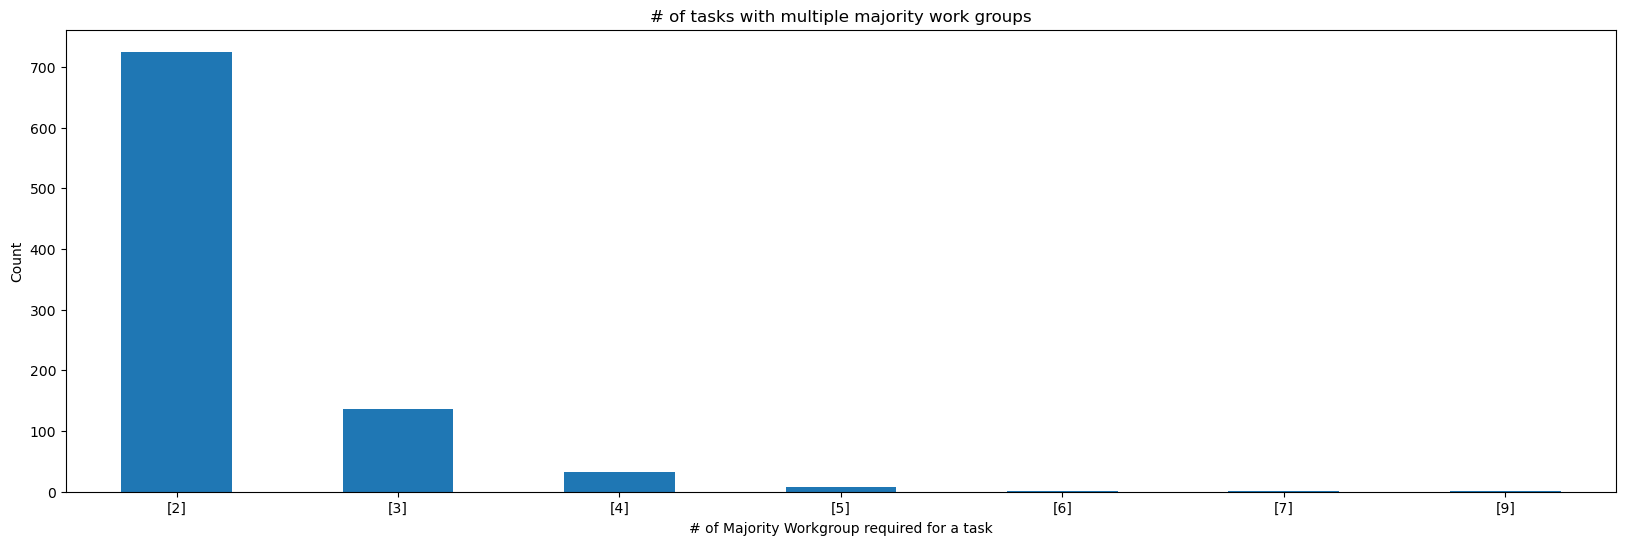

There are 905 total tasks that require 2 or more shops
- 725 tasks required 2 shops
- 137 tasks required 3 shops
- 32 tasks required 4 shops
- 7 shops required 5 shops
- 2 tasks required 6 shops
- 1 task required 7 shops
- 1 shops required 9 shops


In [23]:
# How many tasks require multiple shops?
mwg = Unique_TaskIDs.groupby('Task ID')['# of MWg'].unique()
mult_mwg = mwg.value_counts().iloc[1:]
plt.figure(figsize=(20, 6)) 
mult_mwg.plot(kind='bar')
plt.title('# of tasks with multiple majority work groups')
plt.xlabel('# of Majority Workgroup required for a task')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()
print('There are', mult_mwg.sum(), 'total tasks that require 2 or more shops')
print('- 725 tasks required 2 shops\n- 137 tasks required 3 shops\n- 32 tasks required 4 shops')
print('- 7 shops required 5 shops\n- 2 tasks required 6 shops\n- 1 task required 7 shops')
print('- 1 shops required 9 shops')
# 21210 tasks required 1 shop

In [24]:
# What shops are most responsible
mw = newdf['majority workgroup']
mw.value_counts()

UTIL Exterior Lighting                           402
BMS Carpentry Routine                            246
BMS Electrical Maintenance                       237
BMS Steam Shop                                   194
BMS Carpentry Projects                           165
UTIL High Voltage                                158
BMS Plumbing Construction and Fire Protection    139
BMS Paint Shop                                   131
BMS Sheetmetal Shop                              122
UTIL Water, Gas and Pools                        109
BMS Fire Alarm Shop                               94
BMS Ventilation Shop                              90
BMS Electrical Construction                       86
BMS Refrigeration Shop                            60
BMS Flooring Shop                                 60
BMS Machine Shop                                  57
BMS Plumbing Shop                                 55
BMS Welding Shop                                  40
ENG HVAC Controls Shop                        

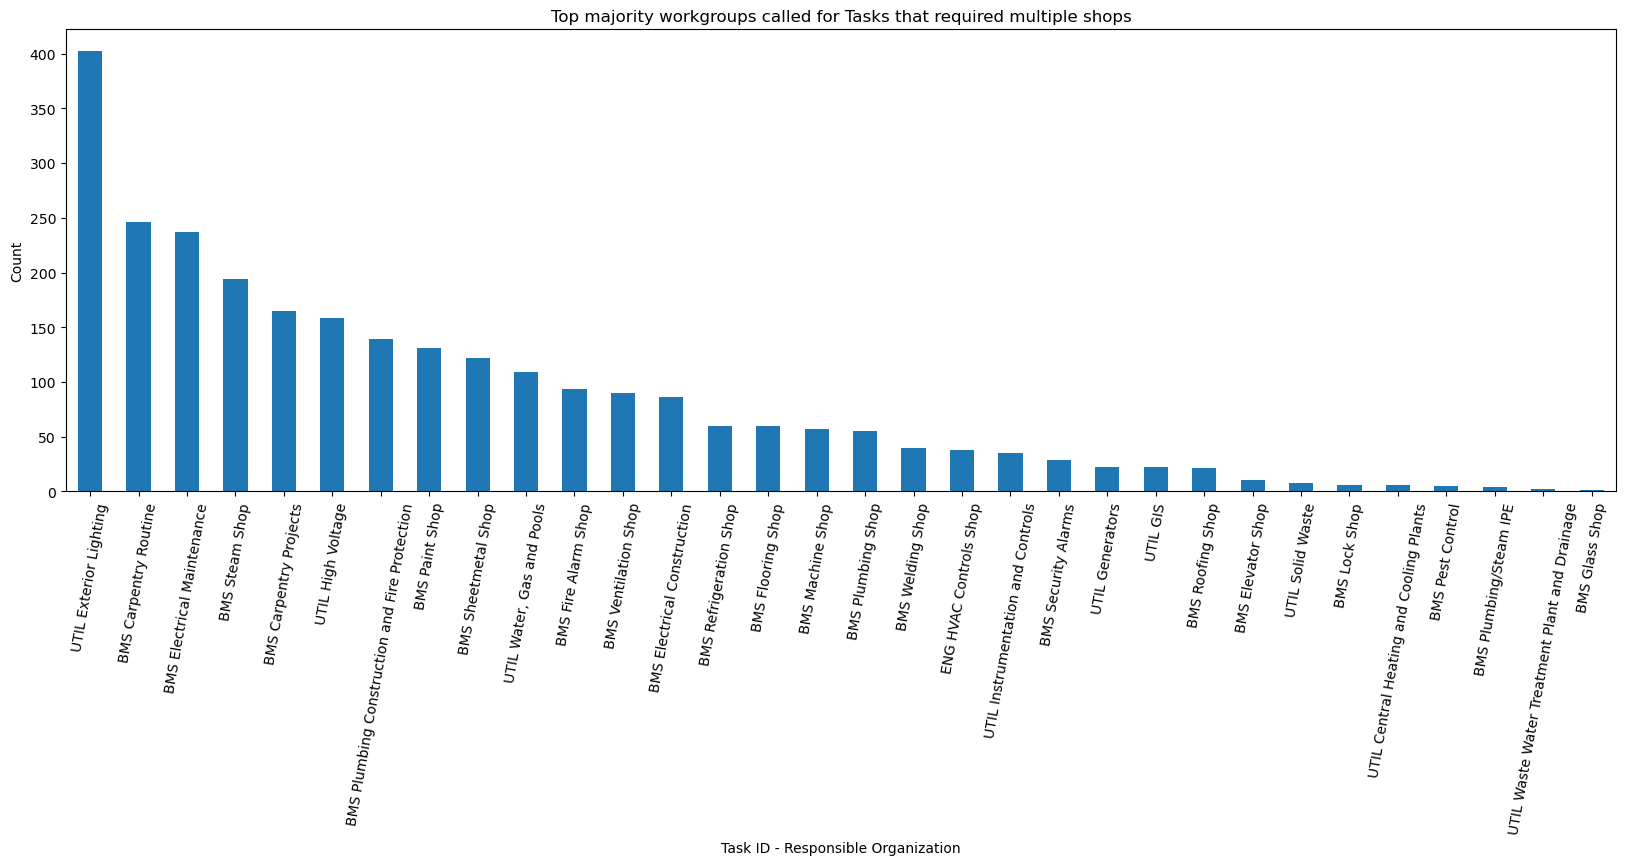

UTIL Exterior Lighting                           402
BMS Carpentry Routine                            246
BMS Electrical Maintenance                       237
BMS Steam Shop                                   194
BMS Carpentry Projects                           165
UTIL High Voltage                                158
BMS Plumbing Construction and Fire Protection    139
BMS Paint Shop                                   131
BMS Sheetmetal Shop                              122
UTIL Water, Gas and Pools                        109
Name: majority workgroup, dtype: int64


In [25]:
plt.figure(figsize=(20, 6)) 
mw.value_counts().plot(kind='bar')
plt.title('Top majority workgroups called for Tasks that required multiple shops')
plt.xlabel('Task ID - Responsible Organization')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()
print(mw.value_counts().head(10))
#mwg_hours = newdf.groupby('majority workgroup')['Actual Labor Hours'].sum()

In [26]:
mwg_hours = newdf.groupby('majority workgroup')['Actual Labor Hours'].sum()
# mwg_hours['BMS Carpentry Projects']
mw_array = newdf['majority workgroup'].unique()
time_per_workgroup = pd.DataFrame({'majority workgroup': [], 'Avg Time to complete 1 task': [], 
                                   "# of Tasks":[], 'Actual Labor Hours per mwg':[]}) 

for i in range(len(mw_array)):
    total_time = mwg_hours[mw_array[i]]
    num_wg = mw.value_counts()[mw_array[i]]
    time = total_time / num_wg
    new_row = {'majority workgroup': mw_array[i], 'Avg Time to complete 1 task': time,
              "# of Tasks": num_wg, 'Actual Labor Hours per mwg': total_time}
    time_per_workgroup.loc[i] = new_row
time_per_workgroup = time_per_workgroup.sort_values(by='Avg Time to complete 1 task', ascending=False)
time_per_workgroup

,majority workgroup,Avg Time to complete 1 task,# of Tasks,Actual Labor Hours per mwg
9,UTIL Exterior Lighting,1094.315920,402,439915.00
14,UTIL Central Heating and Cooling Plants,621.000000,6,3726.00
6,"UTIL Water, Gas and Pools",535.927431,109,58416.09
12,UTIL Solid Waste,509.930000,8,4079.44
5,UTIL Instrumentation and Controls,343.550000,35,12024.25
8,BMS Elevator Shop,290.200000,10,2902.00
7,UTIL High Voltage,226.087025,158,35721.75
19,BMS Steam Shop,185.478351,194,35982.80
11,UTIL Generators,182.625000,22,4017.75
31,BMS Plumbing/Steam IPE,172.537500,4,690.15


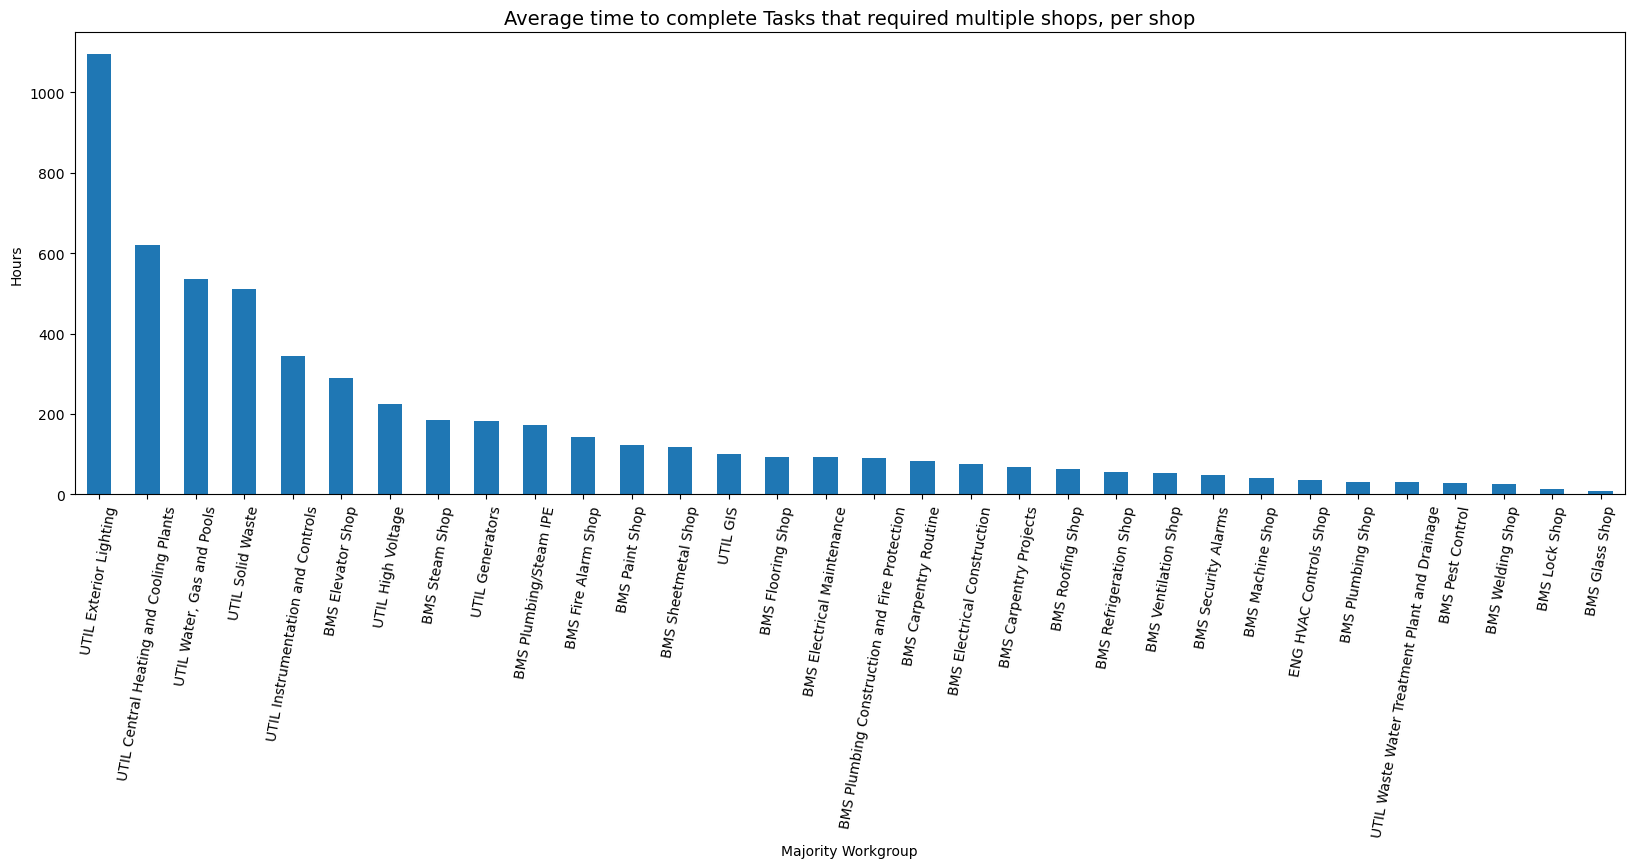

In [27]:
# How long do these tasks take?

plt.figure(figsize=(20, 6)) 
time_per_workgroup.set_index('majority workgroup')['Avg Time to complete 1 task'].plot(kind = 'bar')
plt.title('Average time to complete Tasks that required multiple shops, per shop', fontsize = 14)
plt.xlabel('Majority Workgroup')
plt.ylabel('Hours')
plt.xticks(rotation=80)
plt.show()


In [28]:
# What types of tasks are these?
tasktype = multWg_df.groupby('Task ID')['Task Type'].unique()
tasktype.value_counts()

[Corrective]    632
[New Work]      150
[Service]       116
[Operations]      6
Name: Task Type, dtype: int64

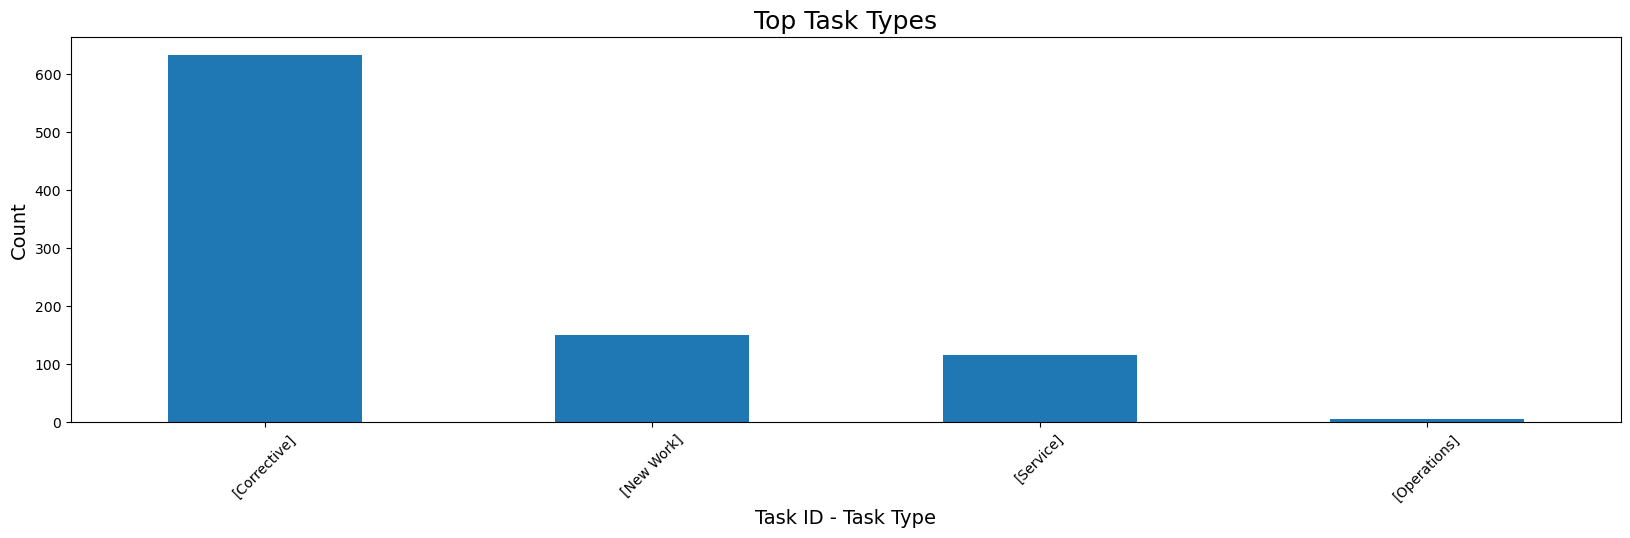

Of the 905 total tasks that require multiple shops:
- 632 tasks are Corrective
- 150 tasks are New Work
- 116 tasks are Service
- 6 tasks are Operations


In [29]:
plt.figure(figsize=(20, 5)) 
tasktype.value_counts().plot(kind='bar')
plt.title('Top Task Types', fontsize = 18)
plt.xlabel('Task ID - Task Type', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(rotation=45)
plt.show()
print("Of the 905 total tasks that require multiple shops:")
print("- 632 tasks are Corrective\n- 150 tasks are New Work")
print("- 116 tasks are Service\n- 6 tasks are Operations")

In [30]:
task_time = multWg_df.groupby('Task Type')['Actual Labor Hours'].sum()
print('Average Labor hours it takes to complete each Task type\n')
print('Corrective :\t', round(task_time['Corrective']/632, 2))
print('New Work :\t', round(task_time['New Work']/150, 2))
print('Service :\t', round(task_time['Service']/116,2))
print('Operations :\t', round(task_time['Operations']/6, 2))

Average Labor hours it takes to complete each Task type

Corrective :	 34.13
New Work :	 76.04
Service :	 70.15
Operations :	 389.36


In [31]:
# What Buildings are these associated with?

building = multWg_df.groupby('Task ID')['Building'].unique()
building.value_counts().head(20)

[Meyer Hall]                               33
[Kemper Hall]                              28
[Tupper Hall]                              24
[Briggs Hall]                              20
[Hickey Gym]                               19
[Genome & Biomedical Sciences Facility]    17
[Social Sciences & Humanities]             15
[Bainer Hall]                              15
[Shields Library (ENTER AT DOCK)]          14
[Cowell Building]                          14
[Veterinary Medicine 2]                    14
[UCD Buildings]                            13
[Chemistry]                                13
[Wickson Hall]                             13
[Pritchard VMTH]                           12
[Green Hall]                               11
[Chemistry Annex]                          10
[CFA Mondavi]                              10
[Hoagland Hall]                             9
[Exterior Street/Pathway Lighting]          9
Name: Building, dtype: int64

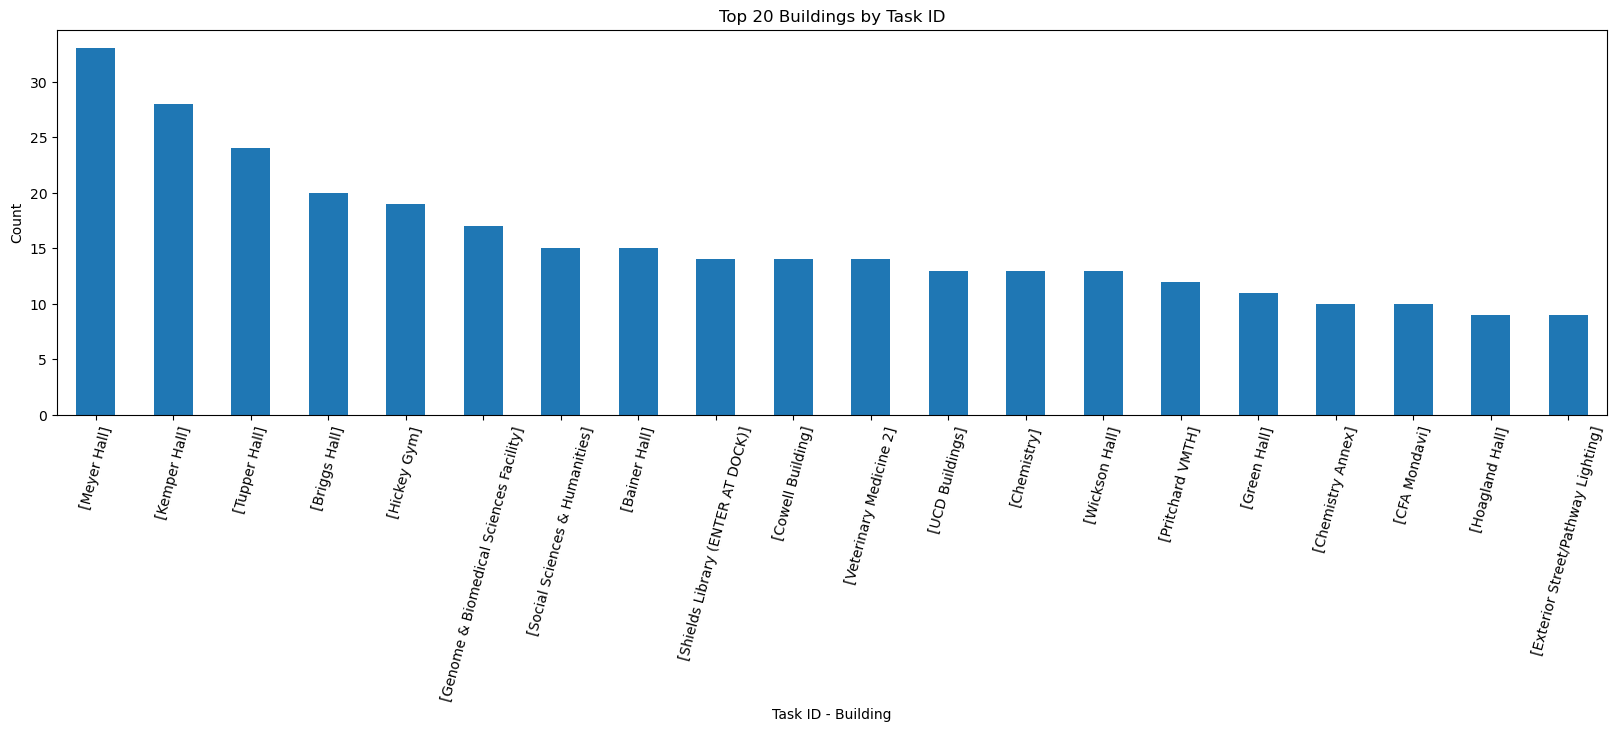

[Meyer Hall]                               33
[Kemper Hall]                              28
[Tupper Hall]                              24
[Briggs Hall]                              20
[Hickey Gym]                               19
[Genome & Biomedical Sciences Facility]    17
[Social Sciences & Humanities]             15
[Bainer Hall]                              15
[Shields Library (ENTER AT DOCK)]          14
[Cowell Building]                          14
[Veterinary Medicine 2]                    14
[UCD Buildings]                            13
[Chemistry]                                13
[Wickson Hall]                             13
[Pritchard VMTH]                           12
[Green Hall]                               11
[Chemistry Annex]                          10
[CFA Mondavi]                              10
[Hoagland Hall]                             9
[Exterior Street/Pathway Lighting]          9
Name: Building, dtype: int64


In [32]:
plt.figure(figsize=(20, 5)) 
building.value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Buildings by Task ID')
plt.xlabel('Task ID - Building')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()
print(building.value_counts().head(20))